# Assumed Constants

In [26]:
# X direction pointed towards Galactic Center
# Y direction pointed towards direction of Rotation
# Z direction pointed towards Galactic North Pole
# X_sun = -8000 parsecs
# Y_sun = 0 parsecs
# Z_sun = 25 parsecs

#Cross-Match for both PanStarrs and GAIA DR2
#was done using http://cdsxmatch.u-strasbg.fr/xmatch
#I divided the Marchetti subset into 2 Tables so it would 
#be small enough. My two tables consisted of 3 columns:
#The first one being the Marchetti index; the second one
#being the RA and the third one the DEC.

# Importing and Creating Tables for PanStarrs crossmatch

In [1]:
# Importing Table to create tables; numpy for changing them; plt for making plots
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

# Creating the tables. I'll join them together later
PanStarrs = Table.read('C:/Users/dougl/Downloads/TAABLE1.csv', format = 'csv')
PanStarrs2 = Table.read('C:/Users/dougl/Downloads/TAABLE2.csv', format = 'csv')

#Printing the headers so I know what's inside
print(PanStarrs[1].columns)

<TableColumns names=('angDist','col1','col2','col3','objID','RAJ2000','DEJ2000','errHalfMaj','errHalfMin','errPosAng','f_objID','Qual','Epoch','Ns','Nd','gmag','e_gmag','gKmag','e_gKmag','gFlags','rmag','e_rmag','rKmag','e_rKmag','rFlags','imag','e_imag','iKmag','e_iKmag','iFlags','zmag','e_zmag','zKmag','e_zKmag','zFlags','ymag','e_ymag','yKmag','e_yKmag','yFlags')>


# Joining both tables and matching them to Marchetti

In [2]:
# Setting arrays for both tables of variables I want.
Gmag1 = np.array(PanStarrs["gmag"])
Rmag1 = np.array(PanStarrs["rmag"])
Imag1 = np.array(PanStarrs["imag"])
Zmag1 = np.array(PanStarrs["zmag"])
Ymag1 = np.array(PanStarrs["ymag"])
idx1 = np.array(PanStarrs["col1"])

Gmag2 = np.array(PanStarrs2["gmag"])
Rmag2 = np.array(PanStarrs2["rmag"])
Imag2 = np.array(PanStarrs2["imag"])
Zmag2 = np.array(PanStarrs2["zmag"])
Ymag2 = np.array(PanStarrs2["ymag"])
idx2 = np.array(PanStarrs2["col1"])

# Joining them together. Making the index integers so they work.
Gmag = np.concatenate((Gmag1, Gmag2), axis=0)
Rmag = np.concatenate((Rmag1, Rmag2), axis=0)
Imag = np.concatenate((Imag1, Imag2), axis=0)
Zmag = np.concatenate((Zmag1, Zmag2), axis=0)
Ymag = np.concatenate((Ymag1, Ymag2), axis=0)
idx = np.concatenate((idx1, idx2), axis=0)
idx = idx.astype(np.int64)

In [3]:
# opening Marchetti subset
data_table = Table.read('C:/Users/dougl/Desktop/Marchetti data/data.fits', format = 'fits')

#Setting my desired variables to empty arrays.
X = []
Y = []
Z = []
R = []
U = []
V = []
W = []
dist = []

#loop for getting all the data
for i in idx:
    X.append(data_table["xGC"][i])
    Y.append(data_table["yGC"][i])
    Z.append(data_table["zGC"][i])
    R.append(data_table["RGC"][i])
    U.append(data_table["U"][i])
    V.append(data_table["V"][i])
    W.append(data_table["W"][i])
    dist.append(data_table["dist"][i])

#Setting range for future loops
rng1 = len(X) - 1

# Plotting CMD over all data

Text(0,0.5,'$AbsGmag$')

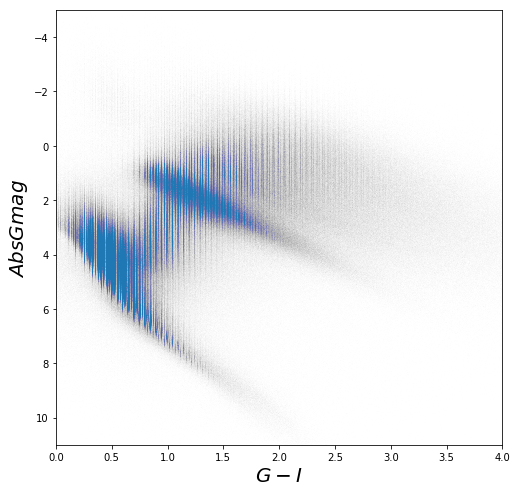

In [4]:
#########################################################
#G-I vs AbsG. Possible to see reddening effects.

#Calculating Absolute Gmag
Abs_Gmag = Gmag - 5*np.log10(dist) + 5

#plotting the image
plt.figure(figsize=(8,8))
plt.scatter(Gmag-Imag, Abs_Gmag, s=0.004, alpha=0.01)
plt.ylim(reversed(plt.ylim()))
plt.xlim(0,4)
plt.ylim(11,-5)
plt.xlabel("$G-I$", fontsize=20)
plt.ylabel("$AbsGmag$", fontsize=20)

Text(0,0.5,'$AbsRmag$')

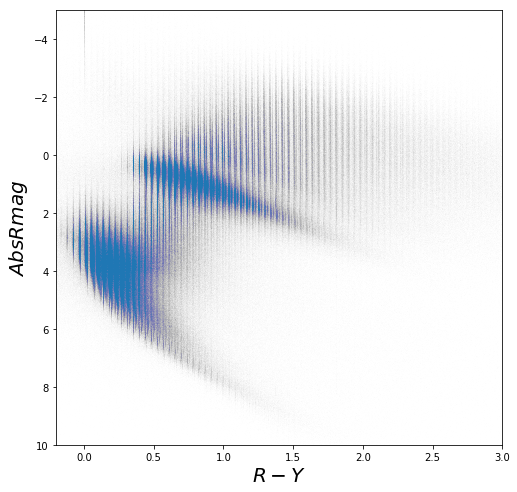

In [5]:
###########################################################
# R-Y vs AbsRmag. Also reddening effects.

#Calculating AbsRmag
Abs_Rmag = Rmag - 5*np.log10(dist) + 5

#Plotting image
plt.figure(figsize=(8,8))
plt.scatter(Rmag-Ymag, Abs_Rmag, s=0.004, alpha=0.01)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-0.2,3)
plt.ylim(10,-5)
plt.xlabel("$R-Y$", fontsize=20)
plt.ylabel("$AbsRmag$", fontsize=20)

# Selecting data in a cylinder of radius 100pc around Sun

In [6]:
#Setting empty arrays 
X_Close = []
Y_Close = []
Gmag_Close = []
Rmag_Close = []
Imag_Close = []
Zmag_Close = []
Ymag_Close = []
dist_Close = []

#loop to select close stars, first centering them around Sun
for i in range(0,rng1):
    X_loop = X[i] + 8000
    Y_loop = Y[i]
    Gmag_loop = Gmag[i]
    Rmag_loop = Rmag[i]
    Imag_loop = Imag[i]
    Zmag_loop = Zmag[i]
    Ymag_loop = Ymag[i]
    dist_loop = dist[i]
    
    r_squared = X_loop**2 + Y_loop**2
    
    # Selecting only the close ones and appending them
    if r_squared <= 10000:
        X_Close.append(X_loop*0.001 - 8)
        Y_Close.append(Y_loop*0.001)
        Gmag_Close.append(Gmag_loop)
        Rmag_Close.append(Rmag_loop)
        Imag_Close.append(Imag_loop)
        Zmag_Close.append(Zmag_loop)
        Ymag_Close.append(Ymag_loop)
        dist_Close.append(dist_loop)

#Making them numpy arrays for easy managing   
Gmag_Close = np.array(Gmag_Close)
Rmag_Close = np.array(Rmag_Close)
Imag_Close = np.array(Imag_Close)
Zmag_Close = np.array(Zmag_Close)
Ymag_Close = np.array(Ymag_Close)
dist_Close = np.array(dist_Close)

# PanStarrs CMD of close stars

Text(0,0.5,'$AbsRmag$')

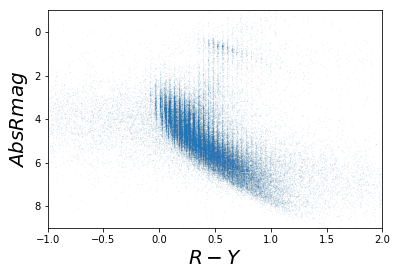

In [7]:
###########################################################
# R-Y vs AbsRmag. Way less reddening cause its so close.

#Calculating absolute Rmag
Abs_Rmag2 = Rmag_Close - 5*np.log10(dist_Close) + 5

#Plotting
plt.scatter(Rmag_Close-Ymag_Close, Abs_Rmag2, s=0.02, alpha=0.2)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-1,2)
plt.ylim(9,-1)
plt.xlabel("$R-Y$", fontsize=20)
plt.ylabel("$AbsRmag$", fontsize=20)

# Creating Tables for GAIA DR2 Crossmatch

In [8]:
#creating tables
Gaia_table1 = Table.read('C:/Users/dougl/Downloads/gaia1.csv', format = 'csv')
Gaia_table2 = Table.read('C:/Users/dougl/Downloads/gaia2.csv', format = 'csv')

#printing headers so I know what is in the tables
print(Gaia_table1[1].columns)

<TableColumns names=('angDist','col1','col2','col3','ra_epoch2000','dec_epoch2000','errHalfMaj','errHalfMin','errPosAng','source_id','ra','ra_error','dec','dec_error','parallax','parallax_error','pmra','pmra_error','pmdec','pmdec_error','duplicated_source','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_mag','phot_bp_mean_flux','phot_bp_mean_flux_error','phot_bp_mean_mag','phot_rp_mean_flux','phot_rp_mean_flux_error','phot_rp_mean_mag','bp_rp','radial_velocity','radial_velocity_error','teff_val','a_g_val','e_bp_min_rp_val','radius_val','lum_val')>


# Joining Both GAIA tables and matching them to Marchetti

In [9]:
# Setting arrays for both tables of variables I want.
Gaia_Gmag1 = np.array(Gaia_table1["phot_g_mean_mag"])
Gaia_BPmag1 = np.array(Gaia_table1["phot_bp_mean_mag"])
Gaia_RPmag1 = np.array(Gaia_table1["phot_rp_mean_mag"])
Extinction1 = np.array(Gaia_table1["a_g_val"])
Color_exc1 = np.array(Gaia_table1["e_bp_min_rp_val"])
g_idx1 = np.array(Gaia_table1["col1"])

Gaia_Gmag2 = np.array(Gaia_table2["phot_g_mean_mag"])
Gaia_BPmag2 = np.array(Gaia_table2["phot_bp_mean_mag"])
Gaia_RPmag2 = np.array(Gaia_table2["phot_rp_mean_mag"])
Extinction2 = np.array(Gaia_table2["a_g_val"])
Color_exc2 = np.array(Gaia_table2["e_bp_min_rp_val"])
g_idx2 = np.array(Gaia_table2["col1"])

# Joining them together. Making the index integers so they work in loop.
Gaia_Gmag = np.concatenate((Gaia_Gmag1, Gaia_Gmag2), axis=0)
Gaia_BPmag = np.concatenate((Gaia_BPmag1, Gaia_BPmag2), axis=0)
Gaia_RPmag = np.concatenate((Gaia_RPmag1, Gaia_RPmag2), axis=0)
Extinction = np.concatenate((Extinction1, Extinction2), axis=0)
Color_exc = np.concatenate((Color_exc1, Color_exc2), axis=0)
g_idx = np.concatenate((g_idx1, g_idx2), axis=0)
g_idx = g_idx.astype(np.int64)

In [11]:
# Matching it to Marchetti Data

#Creating empty arrays of what I want
Gaia_X = []
Gaia_Y = []
Gaia_Z = []
Gaia_R = []
Gaia_U = []
Gaia_V = []
Gaia_W = []
Gaia_dist = []

#loop
for i in g_idx:
    Gaia_X.append(data_table["xGC"][i])
    Gaia_Y.append(data_table["yGC"][i])
    Gaia_Z.append(data_table["zGC"][i])
    Gaia_R.append(data_table["RGC"][i])
    Gaia_U.append(data_table["U"][i])
    Gaia_V.append(data_table["V"][i])
    Gaia_W.append(data_table["W"][i])
    Gaia_dist.append(data_table["dist"][i])

#Setting range for future loops
rng2 = len(Gaia_X)-1

# Plotting CMD's for GAIA-Marchetti crossmatch

Text(0,0.5,'$M_G$')

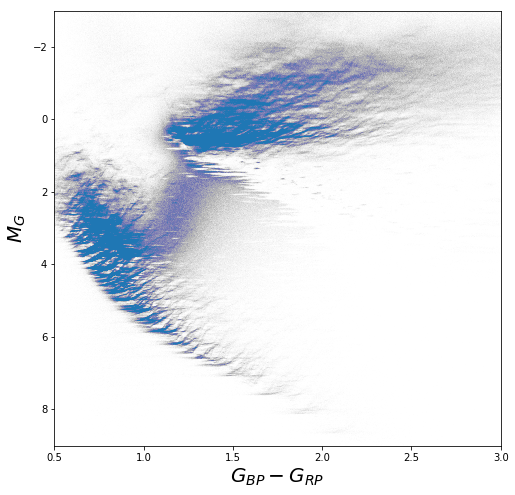

In [12]:
#############################################################################
# Bp-Rp vs AbsGmag over entire Marchetti subset

#Calculating Absolute Magnitude now with Extinction
Abs_gaiaGmag = Gaia_Gmag - 5*np.log10(Gaia_dist) + 5 - Extinction

#Plotting CMD
plt.figure(figsize=(8,8))
plt.scatter(Gaia_BPmag - Gaia_RPmag, Abs_gaiaGmag, s=0.0037, alpha=0.01)
plt.ylim(reversed(plt.ylim()))
plt.xlim(0.5,3)
plt.ylim(9,-3)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize=20)
plt.ylabel("$M_G$", fontsize=20)

# Selecting Stars around the Sun within a radius of 100pc for GAIA

In [21]:
# Creating empty arrays
G_Z_Close = []
G_Gmag_Close = []
G_GBPmag_Close = []
G_GRPmag_Close = []
G_Exct_Close = []
G_ColorE_Close = []
G_dist_Close = []

# looping over all GAIA-Marchetti data
for i in range(0, rng2):
    X_loop = Gaia_X[i] + 8000
    Z_loop = Gaia_Z[i] - 25
    Y_loop = Gaia_Y[i]
    Gmag_loop = Gaia_Gmag[i]
    GBPmag_loop = Gaia_BPmag[i]
    GRPmag_loop = Gaia_RPmag[i]
    Exct_loop = Extinction[i]
    ColorE_loop = Color_exc[i]
    dist_loop = Gaia_dist[i]
    
    r_squared = X_loop**2 + Y_loop**2
    
    # Selecting close stars; appending them and changing X-Y-Z to kpc 
    if r_squared <= 10000:
        G_Z_Close.append((Z_loop + 25)*0.001)
        G_Gmag_Close.append(Gmag_loop)
        G_GBPmag_Close.append(GBPmag_loop)
        G_GRPmag_Close.append(GRPmag_loop)
        G_Exct_Close.append(Exct_loop)
        G_ColorE_Close.append(ColorE_loop)
        G_dist_Close.append(dist_loop)

# making them numpy arrays for easy management. 
G_Z_Close = np.array(G_Z_Close)
G_Gmag_Close = np.array(G_Gmag_Close)
G_GBPmag_Close = np.array(G_GBPmag_Close)
G_GRPmag_Close = np.array(G_GRPmag_Close)
G_Exct_Close = np.array(G_Exct_Close)
G_ColorE_Close = np.array(G_ColorE_Close)
G_dist_Close = np.array(G_dist_Close)

# Plotting GAIA CMD for Close Stars

Text(0,0.5,'$M_G$')

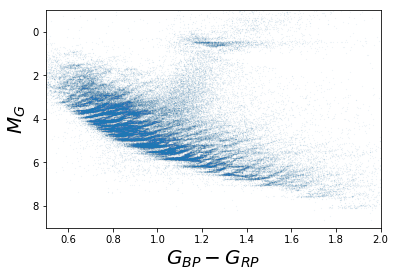

In [22]:
#############################################################
#Bp-Rp vs AbsGmag

#Making my X-axis
BPRP = G_GBPmag_Close - G_GRPmag_Close

#Calculating Absolute Magnitude with Extinction
G_Abs_Gmag_Close = G_Gmag_Close - 5*np.log10(G_dist_Close) + 5 - G_Exct_Close

# Plotting the image
plt.scatter(BPRP, G_Abs_Gmag_Close, s=0.02, alpha=0.2)
plt.ylim(reversed(plt.ylim()))
plt.xlim(0.5,2)
plt.ylim(9,-1)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize=20)
plt.ylabel("$M_G$", fontsize=20)

# Same graph as above but colored based on distance from the Plane

C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


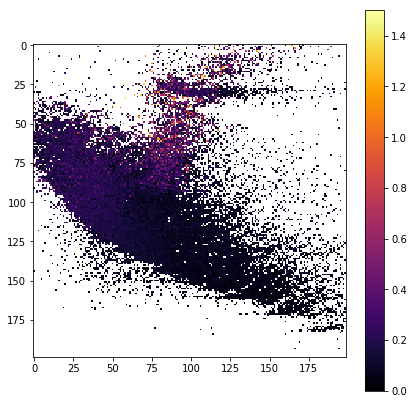

In [25]:
##############################################################################
# Creating bins and 2d Hist for xed and yed.
bin_x = np.arange(0.5,2, step=0.0075)
bin_y = np.arange(-1,9, step=0.05)
H, xed, yed = np.histogram2d(BPRP, G_Abs_Gmag_Close, bins=(bin_x,bin_y))

##############################################################################
# Creating my empty 2-D array that will be my color function
Z_Graph = np.ndarray(shape=(len(yed)-1,len(xed)-1))

##############################################################################
# Loop to index each point; calculate its mean Vphi and set it to array
for i in range(0, len(bin_x)-1):
    
    for j in range(0, len(bin_y)-1):
        
        ichoose = np.where( (BPRP>bin_x[i]) 
                           & (BPRP<bin_x[i+1]) 
                           & (G_Abs_Gmag_Close>bin_y[j]) 
                           & (G_Abs_Gmag_Close<bin_y[j+1]))
        
        ####################################################
        # np matrices do rows first and columns second. Thats why its [j,i]
        Z_Graph[j,i] = np.median(np.abs(G_Z_Close[ichoose]))

##############################################################################
# Plotting image and colorbar
plt.figure(figsize=(7,7))
E = plt.imshow(Z_Graph,cmap='inferno',origin='lower',vmin=0,vmax=1.5)
plt.ylim(reversed(plt.ylim()))
plt.colorbar(E)